<a href="https://colab.research.google.com/github/alibagheribardi/DSP/blob/main/DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DFT Matrix :

The DFT matrix $F$ of size $ N \times N $ is defined as:

$$
F = \frac{1}{\sqrt{N}} \left( w^{kl} \right)_{k,l=0,\ldots,N-1},
$$

where:
- $ w = \exp\left(-\frac{2\pi i}{N}\right) $ is the $ N $-th root of unity.
- $ k $ and $ l$ are the row and column indices, respectively, ranging from $ 0 $ to $ N-1 $.

Each entry of $ F $ is given by:

$$
F_{k,l} = \frac{1}{\sqrt{N}} w^{kl}.
$$

## Square of the DFT Matrix $ F^2 $ :

The square of the DFT matrix $ F^2 $ is computed as:

$$
F^2 = F \cdot F.
$$

The $(k, m)$-th entry of $ F^2 $ is given by:

$$
(F^2)_{k,m} = \sum_{l=0}^{N-1} F_{k,l} \cdot F_{l,m}.
$$

Substituting the definition of $ F $:

$$
(F^2)_{k,m} = \sum_{l=0}^{N-1} \left( \frac{1}{\sqrt{N}} w^{kl} \right) \left( \frac{1}{\sqrt{N}} w^{lm} \right).
$$

Simplifying:

$$
(F^2)_{k,m} = \frac{1}{N} \sum_{l=0}^{N-1} w^{kl + lm}.
$$

We may write:

$$
(F^2)_{k,m} = \frac{1}{N} \sum_{l=0}^{N-1} w^{l(k+m)}.
$$

## Evaluating the Sum:

The sum $ \sum_{l=0}^{N-1} w^{l(k+m)} $ is a geometric series. Recall that:

$$
 \sum_{l=0}^{N-1} w^{lp} =
\begin{cases}
N & \text{if } p \equiv 0 \pmod{N}, \\
0 & \text{otherwise}.
\end{cases}
$$

Here, $ p = k + m $. Thus:

$$
\sum_{l=0}^{N-1} w^{l(k+m)} =
\begin{cases}
N & \text{if } k + m \equiv 0 \pmod{N}, \\
0 & \text{otherwise}.
\end{cases}
$$

Substituting back into $ (F^2)_{k,m} $:

$$
(F^2)_{k,m} = \frac{1}{N} \cdot
\begin{cases}
N & \text{if } k + m \equiv 0 \pmod{N}, \\
0 & \text{otherwise}.
\end{cases}
$$

Simplifying:

$$
(F^2)_{k,m} =
\begin{cases}
1 & \text{if } k + m \equiv 0 \pmod{N}, \\
0 & \text{otherwise}.
\end{cases}
$$

## Structure of $ F^2$

The matrix $ F^2$ has the following structure:
- The $(k, m)$-th entry is $ 1 $ if $ k + m \equiv 0 \pmod{N}$, and $ 0 $ otherwise.
- This means $F^2$ is a permutation matrix that reverses the order of the indices.

For example, if $ N = 4 $, the matrix $ F^2 $ looks like:

$$
F^2 =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}.
$$

This matrix swaps the second and fourth rows/columns.

##General Result:

The square of the DFT matrix $ F^2 $ is a permutation matrix that reverses the order of the indices. Mathematically:

$$
F^2 = P,
$$

where $ P $ is the permutation matrix defined by:

$$
P_{k,m} =
\begin{cases}
1 & \text{if } k + m \equiv 0 \pmod{N}, \\
0 & \text{otherwise}.
\end{cases}
$$

## Implications:

$ F^4 = I $, where $ I $ is the identity matrix. This is because $ F^2 $ is a permutation matrix, and applying it twice returns the original order.


## Eigenmatrix of a Circulant Matrix:

A circulant matrix $ C $ of size $ N \times N $ is defined as:

$$
C =
\begin{pmatrix}
c_0 & c_{N-1} & c_{N-2} & \cdots & c_1 \\
c_1 & c_0 & c_{N-1} & \cdots & c_2 \\
c_2 & c_1 & c_0 & \cdots & c_3 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
c_{N-1} & c_{N-2} & c_{N-3} & \cdots & c_0
\end{pmatrix},
$$

where $ c_0, c_1, \ldots, c_{N-1} $ are the elements of the first row.

## Eigenvectors of $ C $

The columns of $ F $ are the eigenvectors of $ C $. Let $ \mathbf{v}_k $ be the $ k $-th column of $ F $:

$$
\mathbf{v}_k = \frac{1}{\sqrt{N}} \begin{pmatrix}
w^{0 \cdot k} \\
w^{1 \cdot k} \\
w^{2 \cdot k} \\
\vdots \\
w^{(N-1) \cdot k}
\end{pmatrix}.
$$

We show that $ C \mathbf{v}_k = \lambda_k \mathbf{v}_k $, where $ \lambda_k $ is the eigenvalue corresponding to $ \mathbf{v}_k $.

## Proof:

The $ m $-th entry of $ C \mathbf{v}_k$ is:

$$
(C \mathbf{v}_k)_m = \sum_{l=0}^{N-1} C_{m,l} \cdot (\mathbf{v}_k)_l.
$$

Substitute $ C_{m,l} = c_{(m-l) \mod N} $ and $(\mathbf{v}_k)_l = \frac{1}{\sqrt{N}} w^{lk} $:

$$
(C \mathbf{v}_k)_m = \frac{1}{\sqrt{N}} \sum_{l=0}^{N-1} c_{(m-l) \mod N} \cdot w^{lk}.
$$

Let $ n = (m-l) \mod N $. Then $ l = (m-n) \mod N $, and the sum becomes:

$$
(C \mathbf{v}_k)_m = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1} c_n \cdot w^{(m-n)k}.
$$

Factor out $ w^{mk} $:

$$
(C \mathbf{v}_k)_m = \frac{w^{mk}}{\sqrt{N}} \sum_{n=0}^{N-1} c_n \cdot w^{-nk}.
$$

The sum $ \sum_{n=0}^{N-1} c_n \cdot w^{-nk}$ is the DFT of the sequence $ c_0, c_1, \ldots, c_{N-1} $ evaluated at frequency $ k $. Let:

$$
\lambda_k = \sum_{n=0}^{N-1} c_n \cdot w^{-nk}.
$$

Then:

$$
(C \mathbf{v}_k)_m = \frac{w^{mk}}{\sqrt{N}} \lambda_k = \lambda_k (\mathbf{v}_k)_m.
$$

Thus, $ C \mathbf{v}_k = \lambda_k \mathbf{v}_k $, and the columns of $ F $ are the eigenvectors of $ C $.

## Diagonalization of $ C $:

The circulant matrix $ C $ is diagonalized by the DFT matrix $ F $:

$$
C = F \Lambda F^T,
$$

where $\Lambda $ is a diagonal matrix of eigenvalues $ \lambda_k $.


##  An application of eigendecompositon

Let $A$ be a symmetric adjacency matrix associated with an undirected graph model. The eigenvalue decomposition of $A$ can be expressed as

$$
A = V D V^T,
$$

where the columns of $V$ represent the eigenvectors of $A$, and the diagonal matrix $D$ contains the eigenvalues, which are typically distinct in real-world datasets. Let $\lambda_{\text{max}}$ denote the dominant eigenvalue, and let $v_{\text{max}}$ be the corresponding eigenvector, which is found in one of the columns of $V$. The arrangement of the components of $v_{\text{max}}$ reflects the PageRanks of the nodes within the graph.

To elucidate this relationship, consider the constant vector $1$. We can analyze the behavior of the matrix power $A^n$ applied to this vector:

$$
A^n 1 = \lambda_{\text{max}}^n \left( v_{\text{max}} + \sum \left( \frac{\lambda_k}{\lambda_{\text{max}}} \right)^n v_k \right) \to \lambda_{\text{max}}^n v_{\text{max}}.
$$

This expression indicates that, as $n$ approaches infinity, the rate of change of the vector $A^n 1$ converges to the direction of $v_{\text{max}}$. Consequently, this convergence implies that the PageRanks of the nodes are predominantly influenced by the dominant eigenvector associated with the largest eigenvalue.



PageRank Scores:
Node 0: 0.2344
Node 1: 0.2698
Node 2: 0.3148
Node 3: 0.0300
Node 4: 0.1510


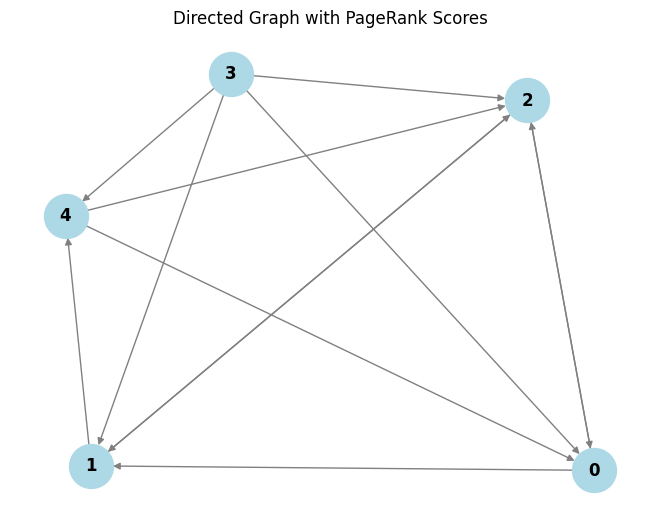

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adj = np.zeros((5,5))

adj[0] = np.array([0, 1, 1, 0, 0])
adj[1] = np.array([0, 0, 1, 0, 1])
adj[2] = np.array([1, 1, 0, 0, 0])
adj[3] = np.array([1, 1, 1, 0, 1])
adj[4] = np.array([1, 0, 1, 0, 0])

# Create a directed graph from the adjacency matrix
G = nx.DiGraph(adj)

# Compute PageRank
pagerank = nx.pagerank(G, alpha=0.85)  # alpha is the damping factor

# Print PageRank scores
print("PageRank Scores:")
for node, score in pagerank.items():
    print(f"Node {node}: {score:.4f}")

# Draw the graph
pos = nx.spring_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color='gray')

# Display the graph
plt.title("Directed Graph with PageRank Scores")
plt.show()

## Discrete Fourier Transform (DFT) and Inverse DFT (IDFT)


Given a discrete signal $x[n]$ of length $N$, its DFT $X[k]$ is defined as:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-\frac{2\pi i}{N} kn}, \quad k = 0, 1, \ldots, N-1
$$

-  $x[n]$: The input signal in the time domain (a sequence of $N$ samples).
    \item $X[k]$: The output signal in the frequency domain (a sequence of $N$ complex numbers).
-  $e^{-\frac{2\pi i}{N} kn}$: The complex exponential basis function,

where:

- $k$ is the frequency index,
- $n$ is the time index,
- $i$ is the imaginary unit ($i^2 = -1$).
        
## Inverse Discrete Fourier Transform (IDFT)

To recover the original signal $x[n]$ from its frequency domain representation $X[k]$, the IDFT is used:

$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{\frac{2\pi i}{N} kn}, \quad n = 0, 1, \ldots, N-1
$$

## Explanation:
    
- $X[k]$: The frequency domain representation of the signal.
- $x[n]$: The recovered time domain signal.
- $e^{\frac{2\pi i}{N} kn}$: The complex exponential basis function for the inverse transform.


## Matrix Representation


$$
X = F \cdot x,
$$

where:

- $X$ is the frequency domain vector ($N \times 1$),
- $x$ is the time domain vector ($N \times 1$),
- $F$ is the DFT matrix ($N \times N$), defined as:

$$
F = \frac{1}{\sqrt{N}} \left( e^{-\frac{2\pi i}{N} kn} \right)_{k,n=0,\ldots,N-1}.
$$

and

$$
x = F^{-1} \cdot X,
$$

where:


- $F^{-1}$ is the inverse DFT matrix ($N \times N$), defined as:

$$ F^{-1} = \frac{1}{\sqrt{N}} \left( e^{\frac{2\pi i}{N} kn} \right)_{k,n=0,\ldots,N-1}.
$$


Given a discrete signal $x[n]$ of length $N$.
Compute $X[k]$ using the DFT formula:

$$
        X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-\frac{2\pi i}{N} kn}.
$$


Given the frequency domain representation $X[k]$.
Recover the original signal $x[n]$ using the IDFT formula:

$$
        x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{\frac{2\pi i}{N} kn}.
$$


##  Key Points

- The DFT transforms a signal from the time domain to the frequency domain.
- The IDFT transforms a signal from the frequency domain back to the time domain.
- The DFT and IDFT are reversible operations, meaning applying the DFT followed by the IDFT recovers the original signal.


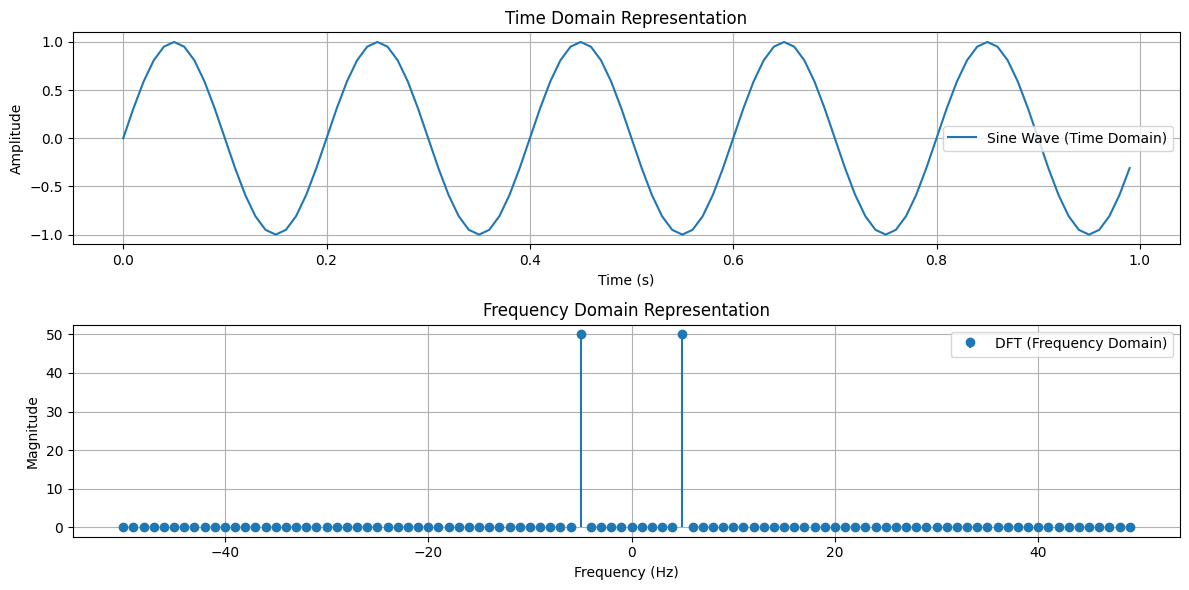

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1  # Amplitude
f = 5  # Frequency (Hz)
phi = 0  # Phase shift
fs = 100  # Sampling frequency (Hz)
T = 1 / fs  # Sampling interval
t = np.arange(0, 1, T)  # Time vector (1 second duration)

# Generate the sine wave signal
x = A * np.sin(2 * np.pi * f * t + phi)

# Compute the DFT
X = np.fft.fft(x)  # Fast Fourier Transform
frequencies = np.fft.fftfreq(len(x), T)  # Frequency bins

# Plot the time domain signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Sine Wave (Time Domain)')
plt.title('Time Domain Representation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot the frequency domain signal
plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(X), label='DFT (Frequency Domain)', basefmt=" ")
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

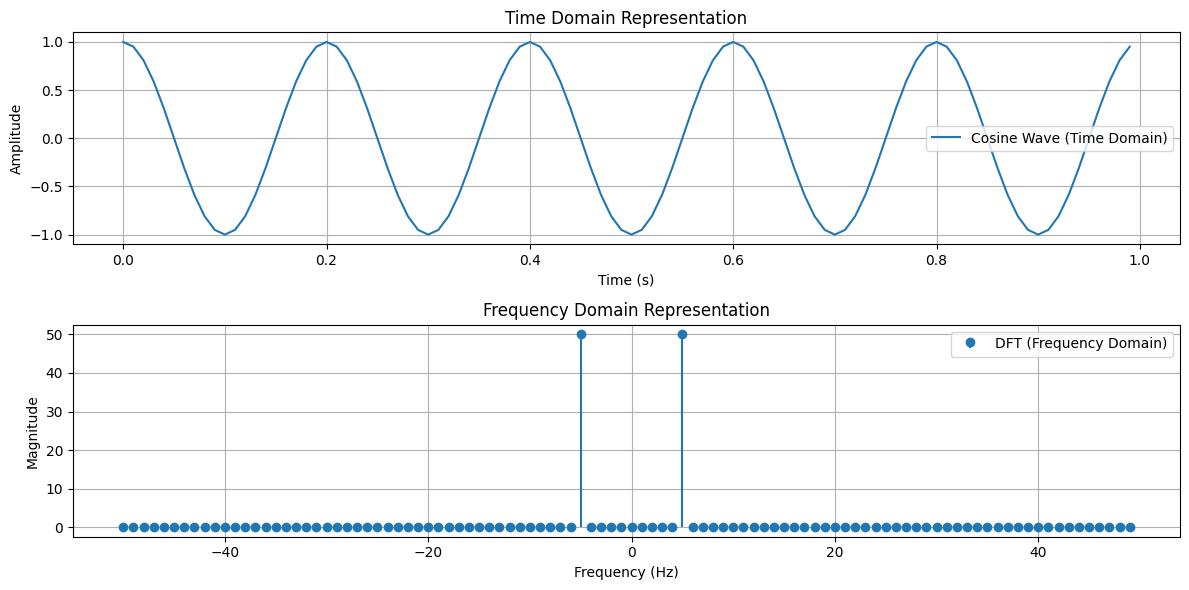

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1  # Amplitude
f = 5  # Frequency (Hz)
phi = 0  # Phase shift
fs = 100  # Sampling frequency (Hz)
T = 1 / fs  # Sampling interval
t = np.arange(0, 1, T)  # Time vector (1 second duration)

# Generate the cosine wave signal
x = A * np.cos(2 * np.pi * f * t + phi)

# Compute the DFT
X = np.fft.fft(x)  # Fast Fourier Transform
frequencies = np.fft.fftfreq(len(x), T)  # Frequency bins

# Plot the time domain signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Cosine Wave (Time Domain)')
plt.title('Time Domain Representation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot the frequency domain signal
plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(X), label='DFT (Frequency Domain)', basefmt=" ")
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

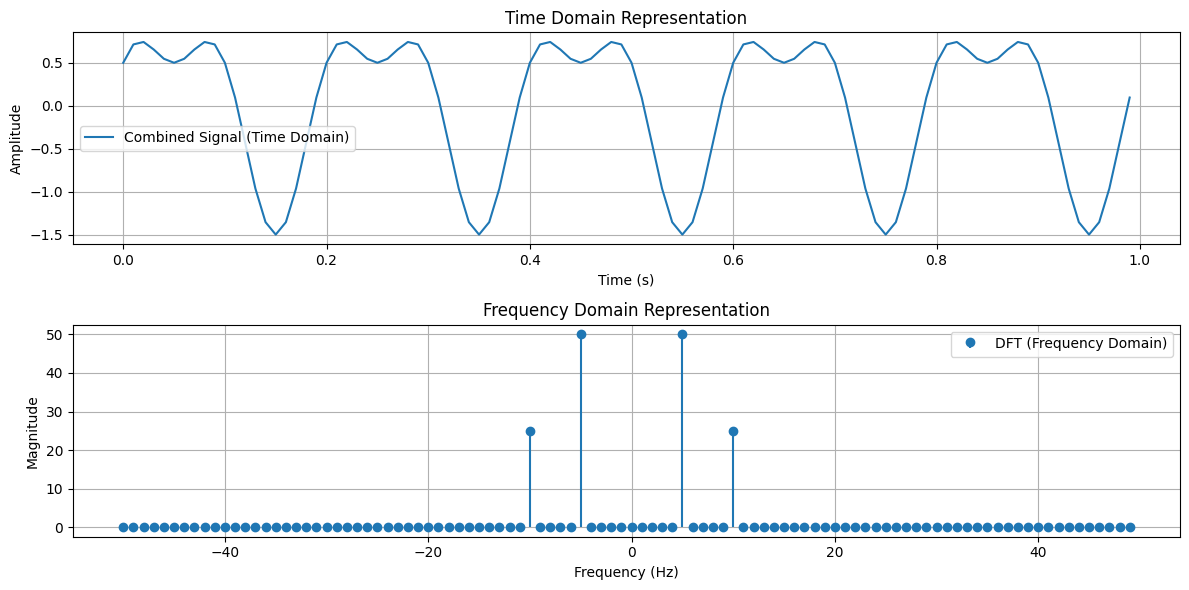

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A1 = 1  # Amplitude of sine wave
f1 = 5  # Frequency of sine wave (Hz)
phi1 = 0  # Phase shift of sine wave

A2 = 0.5  # Amplitude of cosine wave
f2 = 10  # Frequency of cosine wave (Hz)
phi2 = 0  # Phase shift of cosine wave

fs = 100  # Sampling frequency (Hz)
T = 1 / fs  # Sampling interval
t = np.arange(0, 1, T)  # Time vector (1 second duration)

# Generate the combined signal
x = A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.cos(2 * np.pi * f2 * t + phi2)

# Compute the DFT
X = np.fft.fft(x)  # Fast Fourier Transform
frequencies = np.fft.fftfreq(len(x), T)  # Frequency bins

# Plot the time domain signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Combined Signal (Time Domain)')
plt.title('Time Domain Representation')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot the frequency domain signal
plt.subplot(2, 1, 2)
plt.stem(frequencies, np.abs(X), label='DFT (Frequency Domain)', basefmt=" ")
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()